<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.12.0


In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape:", X_train.shape)

X_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2941 - accuracy: 0.9139 - val_loss: 0.1345 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1399 - accuracy: 0.9576 - val_loss: 0.0952 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1051 - accuracy: 0.9686 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0863 - accuracy: 0.9737 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.0731 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0648 - val_accura

<function matplotlib.pyplot.legend(*args, **kwargs)>

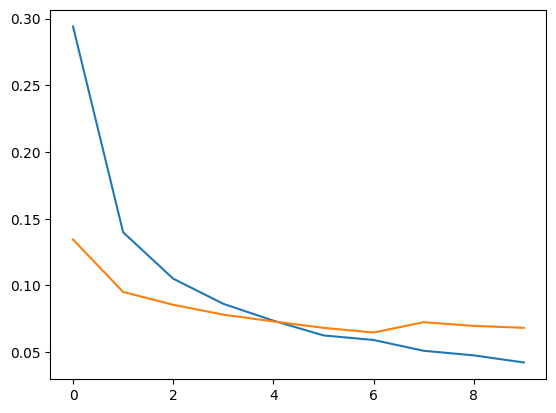

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend

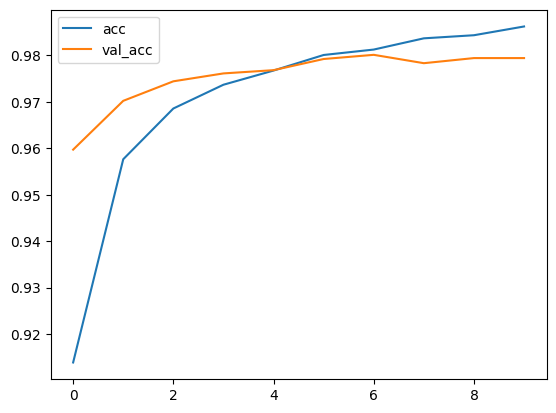

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9794
[0.06827803701162338, 0.9793999791145325]


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 971    0    2    1    1    1    2    0    1    1]
 [   0 1125    3    1    0    1    1    0    4    0]
 [   4    3 1008    1    2    0    1    6    6    1]
 [   0    0    9  991    0    1    0    4    2    3]
 [   1    0    6    0  965    0    3    1    1    5]
 [   2    1    0   10    1  868    4    0    4    2]
 [   3    3    0    1    5    2  941    0    3    0]
 [   1    6    9    2    1    0    0 1001    2    6]
 [   4    0    2    6    6    1    1    7  944    3]
 [   1    6    0    4   12    1    0    5    0  980]]


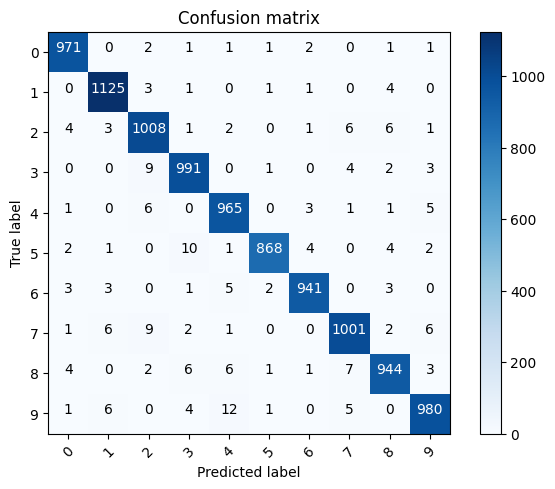

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc



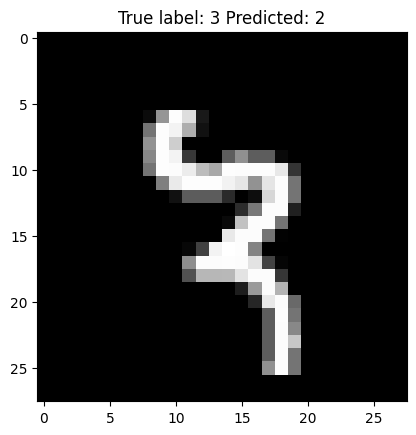

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));